In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Scikit Learn

from sklearn.model_selection import train_test_split,cross_val_score, GridSearchCV
from sklearn.metrics import *
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler,StandardScaler,OneHotEncoder   ### onrhot convert 0&1
from sklearn.compose import ColumnTransformer#### col tranform
from sklearn.feature_selection import SelectFromModel
import joblib
import datetime 

from sklearn import datasets
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

from sklearn.linear_model import LogisticRegression

from collections import Counter
from sklearn import model_selection, naive_bayes, svm, metrics, feature_extraction


## Statsmodel
import statsmodels.api as sm

In [2]:
df = pd.read_excel(r'C:\Users\Hp\Downloads\Practice Data frames\Database\data_airline_reviews.xlsx')

In [3]:
df

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,NaN,Business,Economy Class,London to Izmir via Istanbul,2019-05-01 00:00:00,4.0,5.0,4.0,4.0,2.0,4.0,yes
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,2019-05-01 00:00:00,4.0,1.0,1.0,1.0,1.0,1.0,no
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131890,Ukraine International,NaN,Andriy Yesypenko,19th May 2006,Kiev - London (Gatwick) in business class (in ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
131891,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131892,Ukraine International,NaN,Volodya Bilotkach,29th April 2006,Several flights - KBP to AMS (3 times one way)...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
131893,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.shape,df.isnull().sum().sort_values()

((131895, 17),
 airline             65948
 customer_review     65948
 author              65948
 review_date         65948
 recommended         67455
 overall             67878
 value_for_money     67920
 cabin               68592
 cabin_service       71180
 seat_comfort        71214
 food_bev            79287
 entertainment       87702
 traveller_type      92140
 route               92169
 date_flown          92262
 ground_service      92537
 aircraft           112177
 dtype: int64)

In [5]:
# Due to presence of null rows after every row the size of the original dataset was 131895 
# After treating null rows we should expect around half of the original data set which is around 131865/2 = 65932.5

In [6]:
df = df[df.airline.notnull()]
df.shape

(65947, 17)

In [7]:
dfn = df.copy() # Backup variable

In [8]:
df = dfn.copy()

<Axes: >

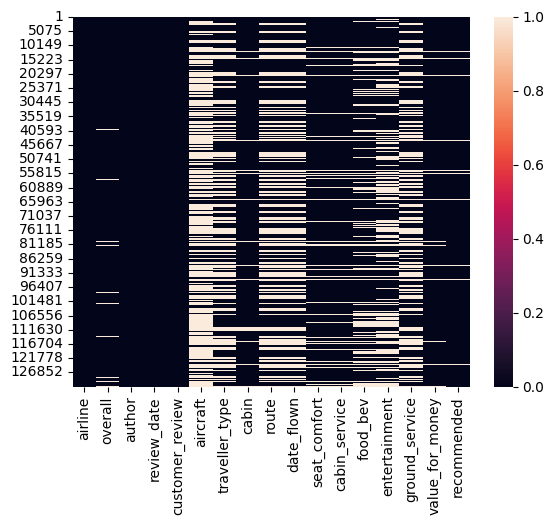

In [9]:
sns.heatmap(df.isnull())

In [10]:
x = pd.DataFrame([df.dtypes, df.isnull().sum(), round((df.isnull().sum()*100/len(df)), 2)]).transpose()
x.rename(columns={0:'Data Type', 1:'Null Count ', 2:'Null Count %'}, inplace = True)
x.sort_values(by = ['Null Count %'], ascending = False)


,Data Type,Null Count,Null Count %
aircraft,object,46229,70.1
ground_service,float64,26589,40.32
date_flown,object,26314,39.9
route,object,26221,39.76
traveller_type,object,26192,39.72
entertainment,float64,21754,32.99
food_bev,float64,13339,20.23
seat_comfort,float64,5266,7.99
cabin_service,float64,5232,7.93
cabin,object,2644,4.01


In [11]:
df.route.nunique(), df.aircraft.nunique()

(24549, 2088)

In [12]:
# Dropping unnecessary features
df.drop(['aircraft', 'route', 'date_flown'], axis = 1, inplace = True)

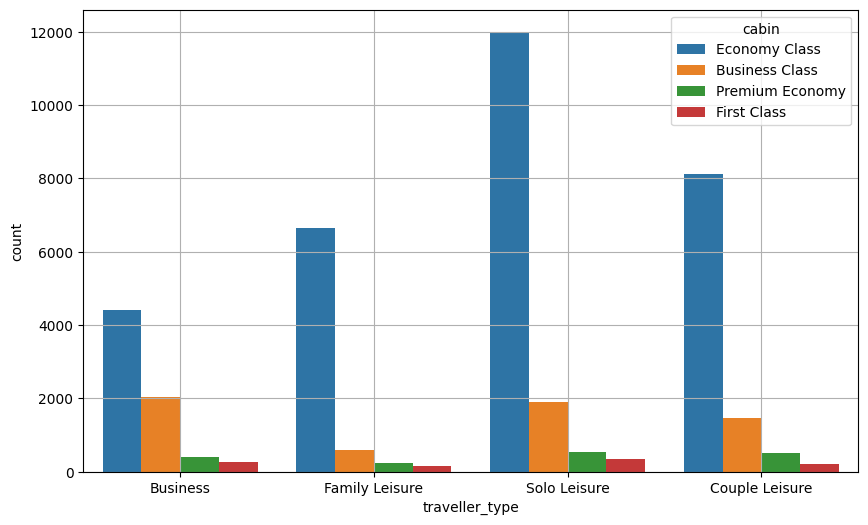

In [13]:
plt.figure(figsize=(10, 6))
sns.countplot(x = df.traveller_type , hue = df['cabin'], saturation=.8)
plt.grid()
plt.show()

In [14]:
# BY analysing above figure, filling the traveller_type, cabin by using f-fill function
df.traveller_type.ffill(inplace = True)
df.cabin.ffill(inplace = True)

In [15]:
# Droping null values from overall, recommended and value_for_money since the 2% data loss is negligible.
df = df[(df.overall.notnull()) & (df.recommended.notnull()) & (df.value_for_money.notnull())]

In [16]:
# Validating Overall review is average of other services reviews

rev_lst = ['seat_comfort','cabin_service','food_bev','entertainment','ground_service','value_for_money']
rev = pd.DataFrame([])
for i in rev_lst:
    rev[f'{i}'] = df[f'{i}']*2

In [17]:
rev['avg'] = rev.mean(axis = 1)
rev['avg_round'] = np.floor(rev.avg)

In [18]:
rev.dropna(inplace = True)

In [19]:
rev

,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,avg,avg_round
1,8.0,10.0,8.0,8.0,4.0,8.0,7.666667,7.0
3,8.0,2.0,2.0,2.0,2.0,2.0,3.000000,3.0
5,2.0,8.0,2.0,6.0,2.0,4.0,4.000000,4.0
7,8.0,10.0,10.0,10.0,10.0,10.0,9.666667,9.0
9,2.0,2.0,2.0,2.0,2.0,2.0,2.000000,2.0
...,...,...,...,...,...,...,...,...
131696,2.0,2.0,2.0,2.0,2.0,2.0,2.000000,2.0
131698,2.0,4.0,2.0,2.0,2.0,2.0,2.333333,2.0
131702,10.0,10.0,10.0,8.0,8.0,8.0,9.000000,9.0
131704,2.0,2.0,2.0,2.0,2.0,2.0,2.000000,2.0


<Axes: xlabel='dif', ylabel='Density'>

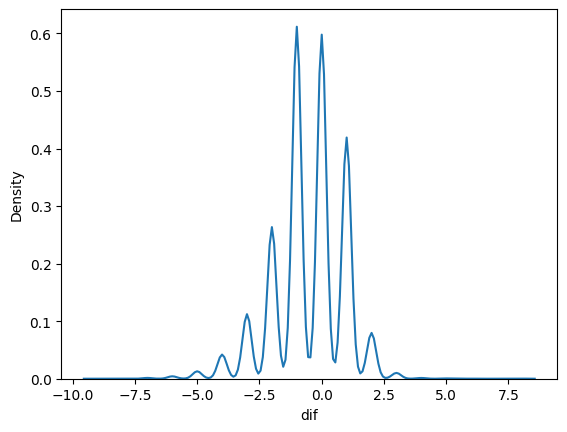

In [20]:
diff = pd.concat([df.overall, rev.avg_round], axis=1)
diff['dif'] = diff.overall - diff.avg_round
sns.kdeplot(diff.dif)

In [21]:
df['overall5'] = np.floor(df['overall']/2)
df['ototal'] = df[['overall5','seat_comfort', 'cabin_service', 'food_bev', 'entertainment',
                 'ground_service', 'value_for_money']].sum(axis = 1)
df['rtotal'] = df[['seat_comfort', 'cabin_service', 'food_bev', 'entertainment',
                 'ground_service', 'value_for_money']].sum(axis = 1)
df['null_count'] = df.isna().sum(axis = 1)

In [22]:
np.floor(df.ototal/(7-df.null_count))

1         3.0
3         1.0
5         1.0
7         4.0
9         0.0
         ... 
131858    3.0
131860    4.0
131862    3.0
131864    4.0
131866    0.0
Length: 62284, dtype: float64

In [23]:
df

,airline,overall,author,review_date,customer_review,traveller_type,cabin,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended,overall5,ototal,rtotal,null_count
1,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,Business,Economy Class,4.0,5.0,4.0,4.0,2.0,4.0,yes,3.0,26.0,23.0,0
3,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,Family Leisure,Economy Class,4.0,1.0,1.0,1.0,1.0,1.0,no,1.0,10.0,9.0,0
5,Turkish Airlines,3.0,M Galerko,7th May 2019,âœ… Trip Verified | Rome to Prishtina via Ista...,Business,Economy Class,1.0,4.0,1.0,3.0,1.0,2.0,no,1.0,13.0,12.0,0
7,Turkish Airlines,10.0,Zeshan Shah,6th May 2019,âœ… Trip Verified | Flew on Turkish Airlines I...,Solo Leisure,Economy Class,4.0,5.0,5.0,5.0,5.0,5.0,yes,5.0,34.0,29.0,0
9,Turkish Airlines,1.0,Pooja Jain,6th May 2019,âœ… Trip Verified | Mumbai to Dublin via Istan...,Solo Leisure,Economy Class,1.0,1.0,1.0,1.0,1.0,1.0,no,0.0,6.0,6.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131858,Ukraine International,4.0,Christian Mueller,29th June 2010,Kiev - Frankfurt - Kiev weekly normally with L...,Couple Leisure,Business Class,NaN,NaN,NaN,NaN,NaN,4.0,yes,2.0,6.0,4.0,5
131860,Ukraine International,8.0,Joerg Lehnert,11th May 2010,Berlin-Kiev-Berlin B737-400. The return flight...,Couple Leisure,Economy Class,NaN,NaN,NaN,NaN,NaN,4.0,yes,4.0,8.0,4.0,5
131862,Ukraine International,5.0,Y Kahanovych,10th May 2010,Some 5 flights within couple months. Most of t...,Couple Leisure,Economy Class,NaN,NaN,NaN,NaN,NaN,4.0,no,2.0,6.0,4.0,5
131864,Ukraine International,8.0,H Ritzer,29th April 2010,Vienna-Kiev return in Coach. Check in fine at ...,Couple Leisure,Economy Class,NaN,NaN,NaN,NaN,NaN,4.0,yes,4.0,8.0,4.0,5


In [24]:
dft = df.copy() # Compare median mode imputation

In [25]:
# filling to achive a balance between overall review and other services review

df = df.fillna(
    {'seat_comfort':np.floor(df.ototal/(7-df.null_count)), 
     'cabin_service':np.floor(df.ototal/(7-df.null_count)), 
     'food_bev':np.floor(df.ototal/(7-df.null_count)), 
     'entertainment':np.floor(df.ototal/(7-df.null_count)),
     'ground_service':np.floor(df.ototal/(7-df.null_count))}
    )

In [26]:
dft = dft.fillna(
    {'seat_comfort':np.median(df.seat_comfort), 
     'cabin_service':np.median(df.cabin_service), 
     'food_bev':np.median(df.food_bev), 
     'entertainment':np.median(df.entertainment),
     'ground_service':np.median(df.ground_service)}
    )

In [27]:
dft = dft.fillna(
    {'seat_comfort':np.floor(df.overall*0.5) - (df.rtotal/df.null_count), 
     'cabin_service':np.floor(df.overall*0.5) - (df.rtotal/df.null_count), 
     'food_bev':np.floor(df.overall*0.5) - (df.rtotal/df.null_count), 
     'entertainment':np.floor(df.overall*0.5) - (df.rtotal/df.null_count),
     'ground_service':np.floor(df.overall*0.5) - (df.rtotal/df.null_count)}
    )

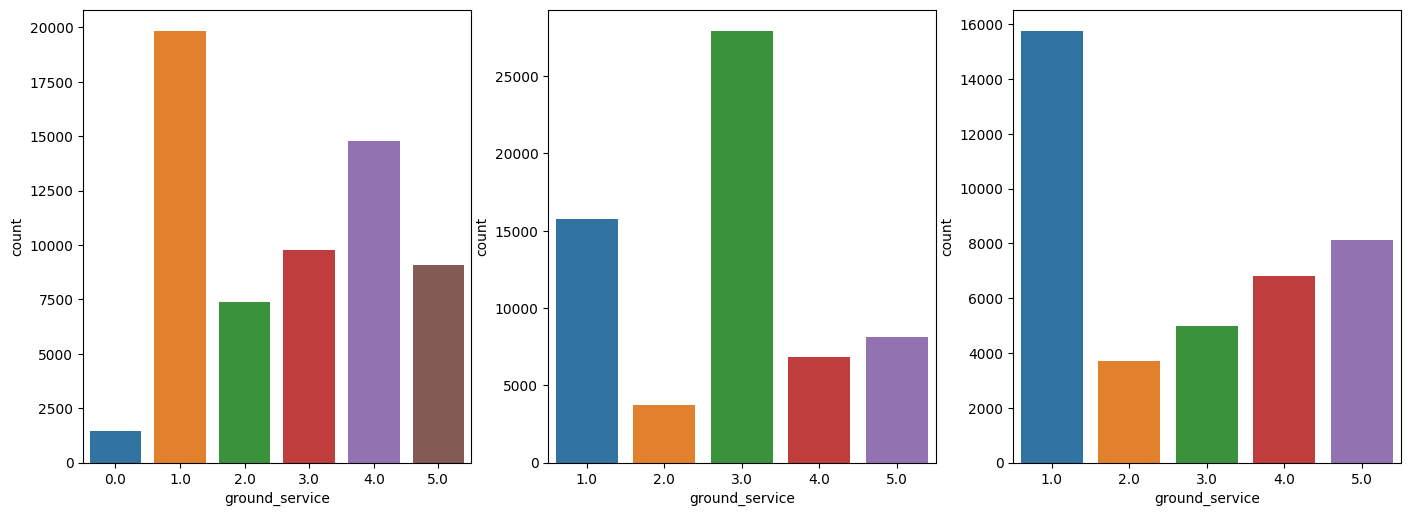

In [28]:
plt.figure(figsize=(17,20))

plt.subplot(3,3,1)
sns.countplot(x = df.ground_service)
plt.subplot(3,3,2)
sns.countplot(x = dft.ground_service)
plt.subplot(3,3,3)
sns.countplot(x = dfn.ground_service)
plt.show()

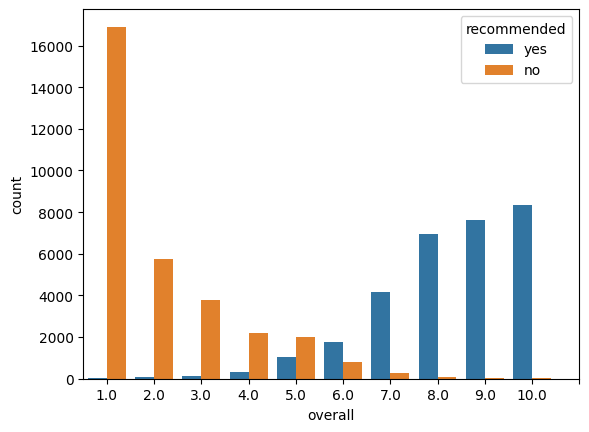

In [29]:
# By analysing this graph it can be said that better the feedback higher the the probability of getting a referral
sns.countplot(data = df, x = 'overall', hue='recommended')
plt.xticks(range(0,11,1))
plt.show()

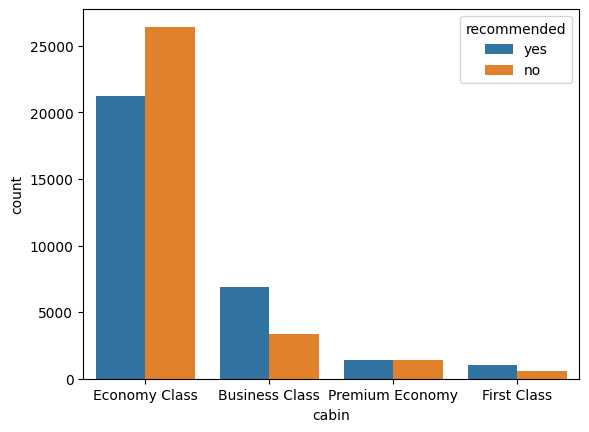

In [30]:
sns.countplot(data = df, x = 'cabin', hue='recommended')
plt.show()

In [31]:
x = pd.DataFrame([df.dtypes, df.isnull().sum(), round((df.isnull().sum()*100/len(df)), 2)]).transpose()
x.rename(columns={0:'Data Type', 1:'Null Count ', 2:'Null Count %'}, inplace = True)
x.sort_values(by = ['Null Count %'], ascending = False)

,Data Type,Null Count,Null Count %
airline,object,0,0.0
overall,float64,0,0.0
rtotal,float64,0,0.0
ototal,float64,0,0.0
overall5,float64,0,0.0
recommended,object,0,0.0
value_for_money,float64,0,0.0
ground_service,float64,0,0.0
entertainment,float64,0,0.0
food_bev,float64,0,0.0


In [32]:
df.reset_index(inplace = True)
df.drop('index',axis = 1, inplace=True)

In [33]:
# Creating a copy for backup
dfg = df.copy()

In [34]:
df = dfg.copy()

In [35]:
df

,airline,overall,author,review_date,customer_review,traveller_type,cabin,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended,overall5,ototal,rtotal,null_count
0,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,Business,Economy Class,4.0,5.0,4.0,4.0,2.0,4.0,yes,3.0,26.0,23.0,0
1,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,Family Leisure,Economy Class,4.0,1.0,1.0,1.0,1.0,1.0,no,1.0,10.0,9.0,0
2,Turkish Airlines,3.0,M Galerko,7th May 2019,âœ… Trip Verified | Rome to Prishtina via Ista...,Business,Economy Class,1.0,4.0,1.0,3.0,1.0,2.0,no,1.0,13.0,12.0,0
3,Turkish Airlines,10.0,Zeshan Shah,6th May 2019,âœ… Trip Verified | Flew on Turkish Airlines I...,Solo Leisure,Economy Class,4.0,5.0,5.0,5.0,5.0,5.0,yes,5.0,34.0,29.0,0
4,Turkish Airlines,1.0,Pooja Jain,6th May 2019,âœ… Trip Verified | Mumbai to Dublin via Istan...,Solo Leisure,Economy Class,1.0,1.0,1.0,1.0,1.0,1.0,no,0.0,6.0,6.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62279,Ukraine International,4.0,Christian Mueller,29th June 2010,Kiev - Frankfurt - Kiev weekly normally with L...,Couple Leisure,Business Class,3.0,3.0,3.0,3.0,3.0,4.0,yes,2.0,6.0,4.0,5
62280,Ukraine International,8.0,Joerg Lehnert,11th May 2010,Berlin-Kiev-Berlin B737-400. The return flight...,Couple Leisure,Economy Class,4.0,4.0,4.0,4.0,4.0,4.0,yes,4.0,8.0,4.0,5
62281,Ukraine International,5.0,Y Kahanovych,10th May 2010,Some 5 flights within couple months. Most of t...,Couple Leisure,Economy Class,3.0,3.0,3.0,3.0,3.0,4.0,no,2.0,6.0,4.0,5
62282,Ukraine International,8.0,H Ritzer,29th April 2010,Vienna-Kiev return in Coach. Check in fine at ...,Couple Leisure,Economy Class,4.0,4.0,4.0,4.0,4.0,4.0,yes,4.0,8.0,4.0,5


In [36]:
df.drop(["airline", 'author', 'review_date', 'overall5', 'rtotal', 'null_count'], axis = 1, inplace = True)


In [37]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
categorical_cols = ['traveller_type', 'cabin', 'recommended']
encoder = OneHotEncoder(drop="first",sparse= False)   ####OneHotEncoder for categorical col
encoder_cols = pd.DataFrame(encoder.fit_transform(df[categorical_cols]),
                            columns = encoder.get_feature_names_out(categorical_cols))



In [38]:
df = pd.concat([encoder_cols, df], axis= 1)
df

,traveller_type_Couple Leisure,traveller_type_Family Leisure,traveller_type_Solo Leisure,cabin_Economy Class,cabin_First Class,cabin_Premium Economy,recommended_yes,overall,customer_review,traveller_type,cabin,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended,ototal
0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,7.0,âœ… Trip Verified | London to Izmir via Istanb...,Business,Economy Class,4.0,5.0,4.0,4.0,2.0,4.0,yes,26.0
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,âœ… Trip Verified | Istanbul to Bucharest. We ...,Family Leisure,Economy Class,4.0,1.0,1.0,1.0,1.0,1.0,no,10.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,âœ… Trip Verified | Rome to Prishtina via Ista...,Business,Economy Class,1.0,4.0,1.0,3.0,1.0,2.0,no,13.0
3,0.0,0.0,1.0,1.0,0.0,0.0,1.0,10.0,âœ… Trip Verified | Flew on Turkish Airlines I...,Solo Leisure,Economy Class,4.0,5.0,5.0,5.0,5.0,5.0,yes,34.0
4,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,âœ… Trip Verified | Mumbai to Dublin via Istan...,Solo Leisure,Economy Class,1.0,1.0,1.0,1.0,1.0,1.0,no,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62279,1.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,Kiev - Frankfurt - Kiev weekly normally with L...,Couple Leisure,Business Class,3.0,3.0,3.0,3.0,3.0,4.0,yes,6.0
62280,1.0,0.0,0.0,1.0,0.0,0.0,1.0,8.0,Berlin-Kiev-Berlin B737-400. The return flight...,Couple Leisure,Economy Class,4.0,4.0,4.0,4.0,4.0,4.0,yes,8.0
62281,1.0,0.0,0.0,1.0,0.0,0.0,0.0,5.0,Some 5 flights within couple months. Most of t...,Couple Leisure,Economy Class,3.0,3.0,3.0,3.0,3.0,4.0,no,6.0
62282,1.0,0.0,0.0,1.0,0.0,0.0,1.0,8.0,Vienna-Kiev return in Coach. Check in fine at ...,Couple Leisure,Economy Class,4.0,4.0,4.0,4.0,4.0,4.0,yes,8.0


In [39]:
df.columns

Index(['traveller_type_Couple Leisure', 'traveller_type_Family Leisure',
       'traveller_type_Solo Leisure', 'cabin_Economy Class',
       'cabin_First Class', 'cabin_Premium Economy', 'recommended_yes',
       'overall', 'customer_review', 'traveller_type', 'cabin', 'seat_comfort',
       'cabin_service', 'food_bev', 'entertainment', 'ground_service',
       'value_for_money', 'recommended', 'ototal'],
      dtype='object')

<Axes: >

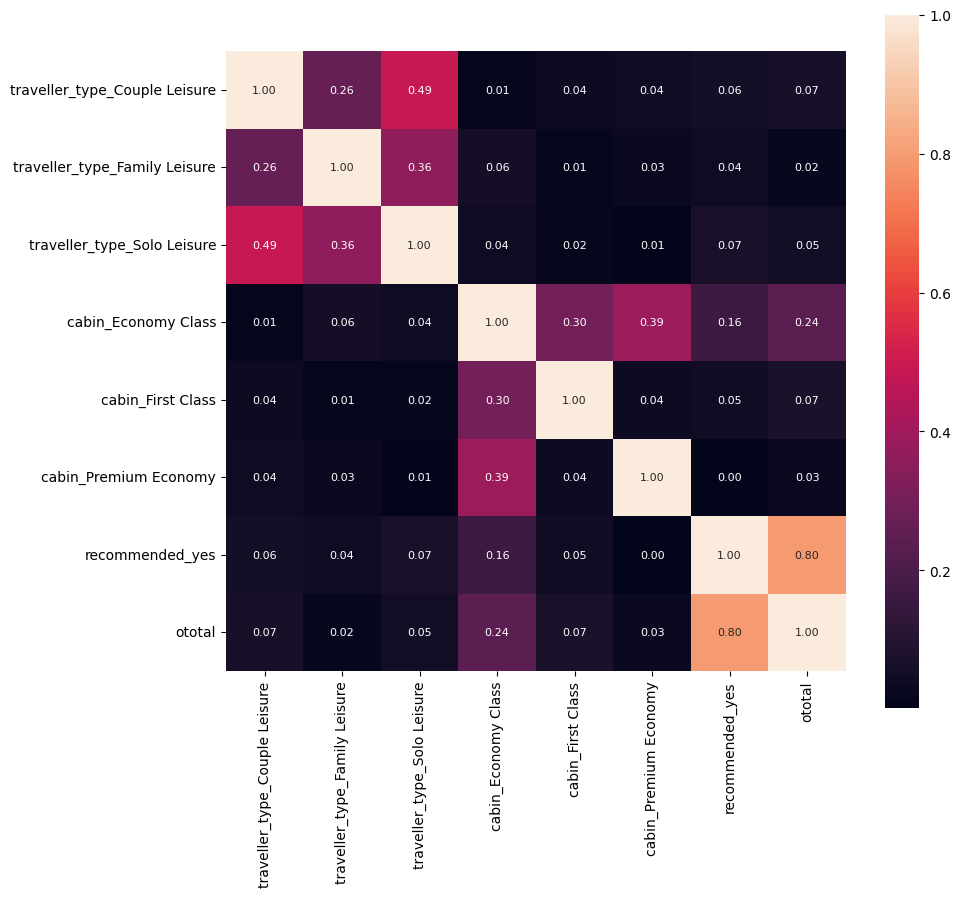

In [40]:
corr = df.drop(['overall','customer_review', 'traveller_type', 'cabin', 'seat_comfort',
       'cabin_service', 'food_bev', 'entertainment', 'ground_service',
       'value_for_money', 'recommended'], axis = 1).corr()

plt.figure(figsize = (10,9))
sns.heatmap(abs(corr),cbar = True,square = True,fmt = ".2f",annot = True,annot_kws={'size':8})

In [41]:
df

,traveller_type_Couple Leisure,traveller_type_Family Leisure,traveller_type_Solo Leisure,cabin_Economy Class,cabin_First Class,cabin_Premium Economy,recommended_yes,overall,customer_review,traveller_type,cabin,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended,ototal
0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,7.0,âœ… Trip Verified | London to Izmir via Istanb...,Business,Economy Class,4.0,5.0,4.0,4.0,2.0,4.0,yes,26.0
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,âœ… Trip Verified | Istanbul to Bucharest. We ...,Family Leisure,Economy Class,4.0,1.0,1.0,1.0,1.0,1.0,no,10.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,âœ… Trip Verified | Rome to Prishtina via Ista...,Business,Economy Class,1.0,4.0,1.0,3.0,1.0,2.0,no,13.0
3,0.0,0.0,1.0,1.0,0.0,0.0,1.0,10.0,âœ… Trip Verified | Flew on Turkish Airlines I...,Solo Leisure,Economy Class,4.0,5.0,5.0,5.0,5.0,5.0,yes,34.0
4,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,âœ… Trip Verified | Mumbai to Dublin via Istan...,Solo Leisure,Economy Class,1.0,1.0,1.0,1.0,1.0,1.0,no,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62279,1.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,Kiev - Frankfurt - Kiev weekly normally with L...,Couple Leisure,Business Class,3.0,3.0,3.0,3.0,3.0,4.0,yes,6.0
62280,1.0,0.0,0.0,1.0,0.0,0.0,1.0,8.0,Berlin-Kiev-Berlin B737-400. The return flight...,Couple Leisure,Economy Class,4.0,4.0,4.0,4.0,4.0,4.0,yes,8.0
62281,1.0,0.0,0.0,1.0,0.0,0.0,0.0,5.0,Some 5 flights within couple months. Most of t...,Couple Leisure,Economy Class,3.0,3.0,3.0,3.0,3.0,4.0,no,6.0
62282,1.0,0.0,0.0,1.0,0.0,0.0,1.0,8.0,Vienna-Kiev return in Coach. Check in fine at ...,Couple Leisure,Economy Class,4.0,4.0,4.0,4.0,4.0,4.0,yes,8.0


In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

x = df.drop(['overall','customer_review', 'traveller_type', 'cabin', 'seat_comfort',
       'cabin_service', 'food_bev', 'entertainment', 'ground_service',
       'value_for_money', 'recommended', 'recommended_yes'], axis = 1)
y = df[['recommended_yes']]

In [87]:
x

,traveller_type_Couple Leisure,traveller_type_Family Leisure,traveller_type_Solo Leisure,cabin_Economy Class,cabin_First Class,cabin_Premium Economy,ototal
0,0.0,0.0,0.0,1.0,0.0,0.0,26.0
1,0.0,1.0,0.0,1.0,0.0,0.0,10.0
2,0.0,0.0,0.0,1.0,0.0,0.0,13.0
3,0.0,0.0,1.0,1.0,0.0,0.0,34.0
4,0.0,0.0,1.0,1.0,0.0,0.0,6.0
...,...,...,...,...,...,...,...
62279,1.0,0.0,0.0,0.0,0.0,0.0,6.0
62280,1.0,0.0,0.0,1.0,0.0,0.0,8.0
62281,1.0,0.0,0.0,1.0,0.0,0.0,6.0
62282,1.0,0.0,0.0,1.0,0.0,0.0,8.0


In [88]:
y

,recommended_yes
0,1.0
1,0.0
2,0.0
3,1.0
4,0.0
...,...
62279,1.0
62280,1.0
62281,0.0
62282,1.0


In [89]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [90]:
scalar = MinMaxScaler()
x_train = scalar.fit_transform(x_train)
x_test = scalar.transform(x_test)

In [91]:
log = LogisticRegression()
model = log.fit(x_train, y_train)

In [92]:
model

LogisticRegression()

In [93]:
print(log.coef_)

[[ 0.16013411 -0.16691833  0.29659747  0.25838521 -0.07692239 -0.41990169
  11.68469776]]


In [94]:
print(log.intercept_)


[-5.90157734]


In [95]:
print("Train Score: ",log.score(x_train,y_train))

Train Score:  0.9019808537539888


In [96]:
print("Test Score: ",log.score(x_test,y_test))

Test Score:  0.9019025447539536


In [97]:
pred_train = log.predict(x_train)
pred_test = log.predict(x_test)

In [98]:
from sklearn.metrics import classification_report
print(classification_report(y_train,pred_train))

              precision    recall  f1-score   support

         0.0       0.90      0.90      0.90     25452
         1.0       0.90      0.90      0.90     24375

    accuracy                           0.90     49827
   macro avg       0.90      0.90      0.90     49827
weighted avg       0.90      0.90      0.90     49827



In [99]:
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

         0.0       0.91      0.90      0.90      6322
         1.0       0.90      0.90      0.90      6135

    accuracy                           0.90     12457
   macro avg       0.90      0.90      0.90     12457
weighted avg       0.90      0.90      0.90     12457



# AUC- ROC Curve and AUC- ROC Score

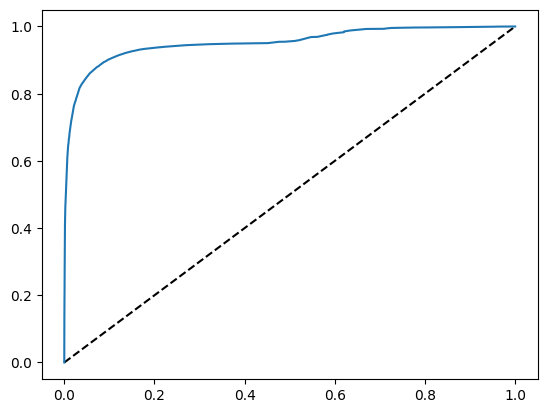

In [100]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, precision_score, recall_score, f1_score, roc_auc_score
rocc = log.predict_proba(x_train)[:,1]

fpr,tpr,threshold = roc_curve(y_train,rocc)
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label= "Logistic")
plt.show()

In [101]:
log.predict_proba(x_train)[:,1]

array([0.22748209, 0.12898997, 0.02587514, ..., 0.22748209, 0.99506817,
       0.02587514])

# GridSearchCV

In [102]:
param_grid = {
    "penalty": ["l1","l2"],
    "C" : [0.1,0.5,1,5,10]
}

In [103]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(estimator=log,param_grid=param_grid,cv=5)

In [104]:
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 0.5, 1, 5, 10], 'penalty': ['l1', 'l2']})

In [105]:
best_param = grid.best_params_
best_model = grid.best_estimator_

In [106]:
y_pred =best_model.predict(x_test)

In [107]:
acc= accuracy_score(y_test,y_pred)
pre = precision_score(y_test,y_pred)
rec= recall_score(y_test, y_pred)
f1 = f1_score(y_test,y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

In [108]:
print("Best Param:",best_param)
print("Accuracy :" , acc)
print("precision:" ,pre)
print("Recall:", rec)
print("F1 Score:" , f1)
print("AUC-ROC:", roc_auc)

Best Param: {'C': 0.1, 'penalty': 'l2'}
Accuracy : 0.902785582403468
precision: 0.9030779305828421
Recall: 0.8991035044824776
F1 Score: 0.9010863350485991
AUC-ROC: 0.9027311258571831


In [109]:
from sklearn.metrics import *

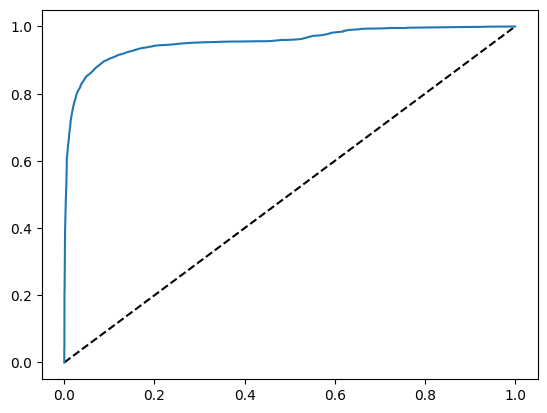

In [110]:
rocc = log.predict_proba(x_test)[:,1]

fpr,tpr,threshold = roc_curve(y_test,rocc)
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label= "Logistic")
plt.show()

In [111]:
roc_auc_score(y_test,rocc)

0.954698924623061

# Matthew's Correlation of Coefficients

In [112]:
mcc = matthews_corrcoef(y_test, pred_test)
print("MCC: " , mcc)

MCC:  0.8037938058447367


# Confusion Matrix

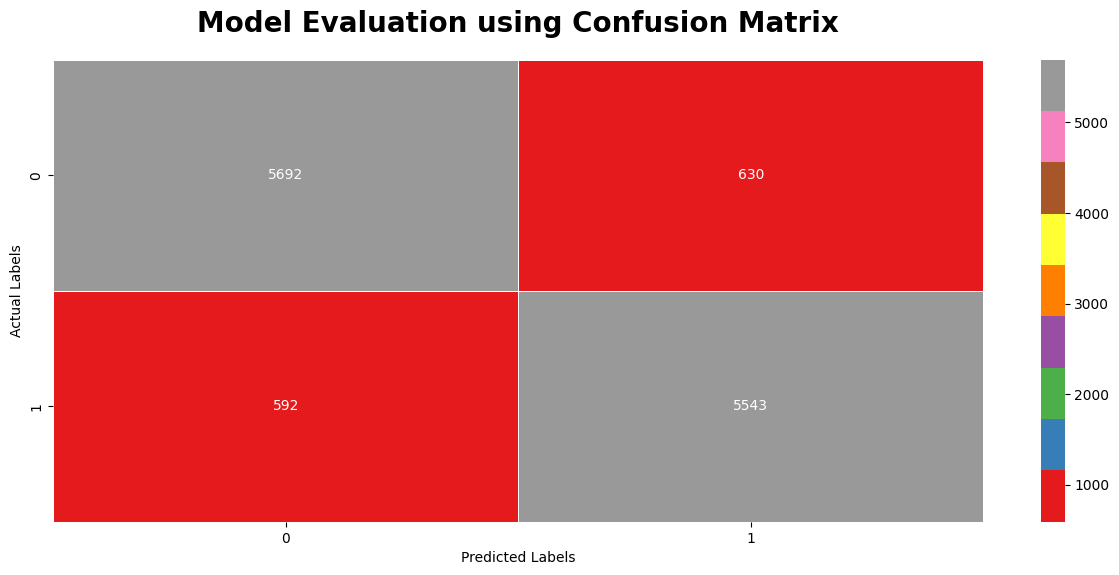

In [113]:
y_test_pred = log.predict(x_test)
cm = confusion_matrix(y_test,y_test_pred)

plt.figure(figsize=(15,6))
sns.heatmap(data=cm, linewidth=.5, annot=True, fmt="g", cmap="Set1")
plt.title("Model Evaluation using Confusion Matrix",fontsize=20,pad=20,fontweight="black")
plt.ylabel("Actual Labels")
plt.xlabel("Predicted Labels")
plt.show()

# 2) SVM

In [114]:
svcm = SVC(kernel= 'linear')  ## linear,rbf,poly,sigmoid, we can applide

In [115]:
svcm.fit(x_train,y_train)

SVC(kernel='linear')

In [116]:
y_pred = svcm.predict(x_test)

In [117]:
acc= accuracy_score(y_test,y_pred)
acc

0.9030264108533355

In [118]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.90      0.91      0.90      6322
         1.0       0.90      0.90      0.90      6135

    accuracy                           0.90     12457
   macro avg       0.90      0.90      0.90     12457
weighted avg       0.90      0.90      0.90     12457



In [119]:
m7 = 'Support Vector Classifier'
svc =  SVC(kernel='rbf', C=2)
svc.fit(x_train, y_train)
svc_predicted = svc.predict(x_test)
svc_conf_matrix = confusion_matrix(y_test, svc_predicted)
svc_acc_score = accuracy_score(y_test, svc_predicted)
print("confussion matrix")
print(svc_conf_matrix)
print("\n")
print("Accuracy of Support Vector Classifier:",svc_acc_score*100,'\n')
print(classification_report(y_test,svc_predicted))

confussion matrix
[[5859  463]
 [ 732 5403]]


Accuracy of Support Vector Classifier: 90.40700008027615 

              precision    recall  f1-score   support

         0.0       0.89      0.93      0.91      6322
         1.0       0.92      0.88      0.90      6135

    accuracy                           0.90     12457
   macro avg       0.91      0.90      0.90     12457
weighted avg       0.90      0.90      0.90     12457



# Confusion Matrix

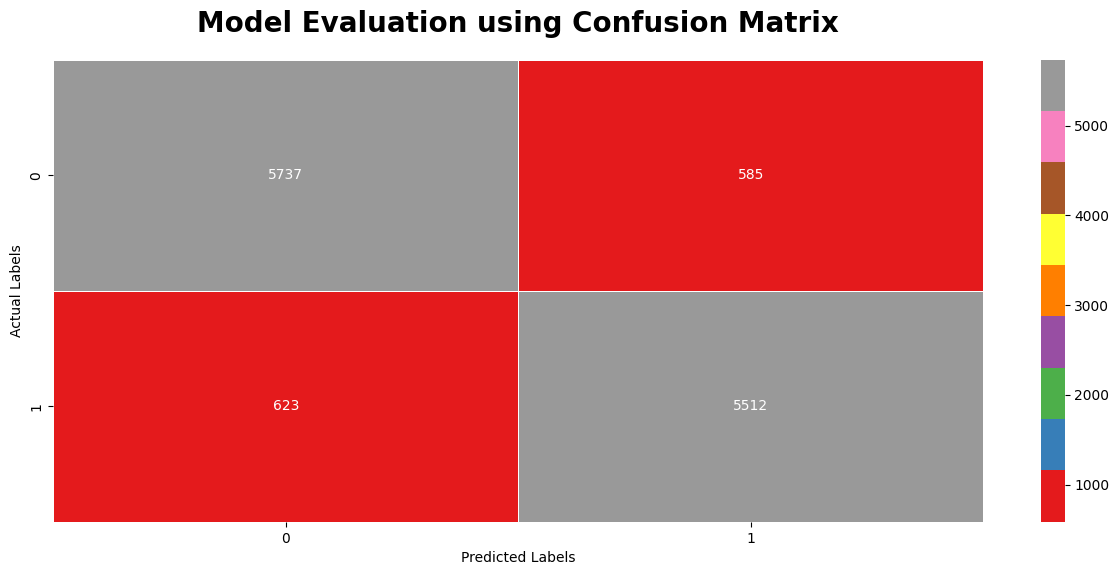

In [121]:
y_test_pred = svcm.predict(x_test)
cm = confusion_matrix(y_test,y_test_pred)

plt.figure(figsize=(15,6))
sns.heatmap(data=cm, linewidth=.5, annot=True, fmt="g", cmap="Set1")
plt.title("Model Evaluation using Confusion Matrix",fontsize=20,pad=20,fontweight="black")
plt.ylabel("Actual Labels")
plt.xlabel("Predicted Labels")
plt.show()

# AUC- ROC Curve and AUC- ROC Score

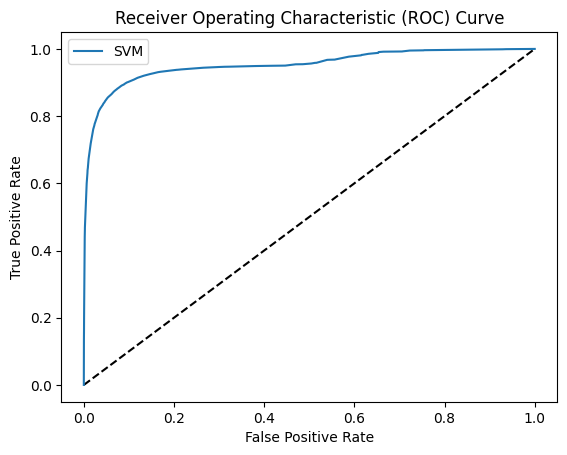

In [122]:
from sklearn import metrics
roc = svcm.decision_function(x_train)
fpr, tpr, thresholds = metrics.roc_curve(y_train, roc)
plt.plot([0, 1], [0, 1], "k--")
plt.plot(fpr, tpr, label="SVM")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [123]:
metrics.roc_auc_score(y_train,roc)

0.9521265610077491

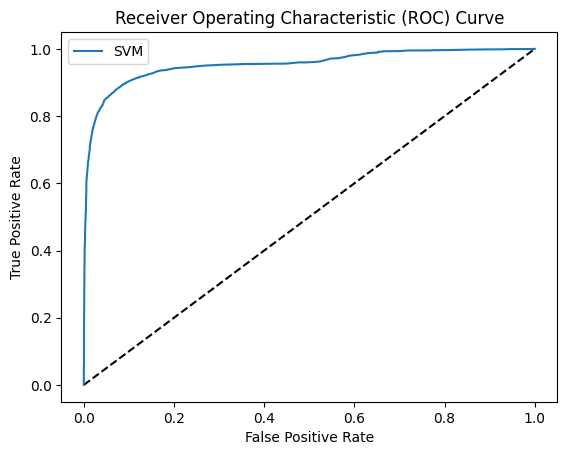

In [124]:
rocc = svcm.decision_function(x_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, rocc)
plt.plot([0, 1], [0, 1], "k--")
plt.plot(fpr, tpr, label="SVM")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [125]:
metrics.roc_auc_score(y_test,rocc)

0.9545595425297153

In [126]:
print("Test Score:",metrics.roc_auc_score(y_test,y_pred))

Test Score: 0.902958749758608


# 3) Naive Bayes

In [127]:
bayes = naive_bayes.GaussianNB()

In [128]:
bayes.fit(x_train, y_train)

GaussianNB()

In [129]:
y_pred_bayes = bayes.predict(x_test)
accuracy_bayes = accuracy_score(y_test, y_pred_bayes)
print("Accuracy (Naive Bayes):", accuracy_bayes)
print("Classification Report (Naive Bayes):")

print(classification_report(y_test, y_pred_bayes))

Accuracy (Naive Bayes): 0.8908244360600466
Classification Report (Naive Bayes):
              precision    recall  f1-score   support

         0.0       0.89      0.90      0.89      6322
         1.0       0.89      0.88      0.89      6135

    accuracy                           0.89     12457
   macro avg       0.89      0.89      0.89     12457
weighted avg       0.89      0.89      0.89     12457



In [130]:
acc = metrics.accuracy_score(y_test,y_pred)
print("Accuracy : {:.2f}%".format(acc*100))

Accuracy : 90.30%


In [131]:
m2 = 'Naive Bayes'
nb = naive_bayes.GaussianNB()
nb.fit(x_train,y_train)
nbpred = nb.predict(x_test)
nb_conf_matrix = confusion_matrix(y_test, nbpred)
nb_acc_score = accuracy_score(y_test, nbpred)
print("confussion matrix")
print(nb_conf_matrix)
print("\n")
print("Accuracy of Naive Bayes model:",nb_acc_score*100,'\n')
print(classification_report(y_test,nbpred))

confussion matrix
[[5672  650]
 [ 710 5425]]


Accuracy of Naive Bayes model: 89.08244360600466 

              precision    recall  f1-score   support

         0.0       0.89      0.90      0.89      6322
         1.0       0.89      0.88      0.89      6135

    accuracy                           0.89     12457
   macro avg       0.89      0.89      0.89     12457
weighted avg       0.89      0.89      0.89     12457



# AUC- ROC Curve and AUC- ROC Score

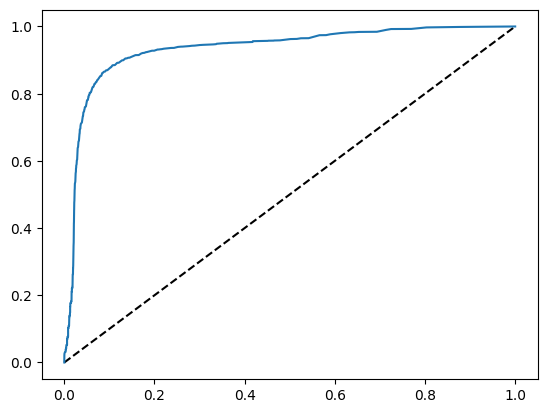

In [132]:
roc_c = bayes.predict_proba(x_train)[:,1]

fpr,tpr,threshold = metrics.roc_curve(y_train,roc_c)
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label= "Naive Bayes")
plt.show()

In [133]:
metrics.roc_auc_score(y_train,roc_c)

0.9334566270546469

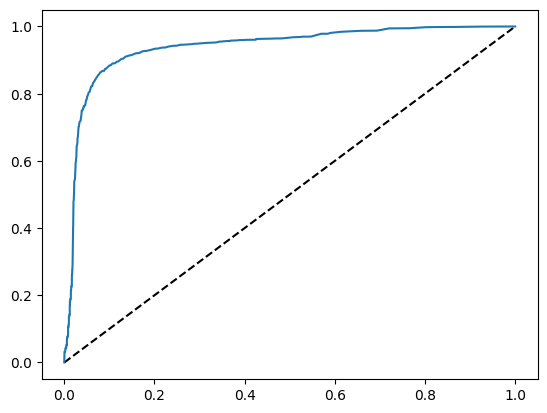

In [134]:
rocc_c = bayes.predict_proba(x_test)[:,1]

fpr,tpr,threshold = metrics.roc_curve(y_test,rocc_c)
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label= "Naive Bayes")
plt.show()

In [135]:
metrics.roc_auc_score(y_test,rocc_c)

0.9384249952366184

# Confusion Matrix For Naive Bayes


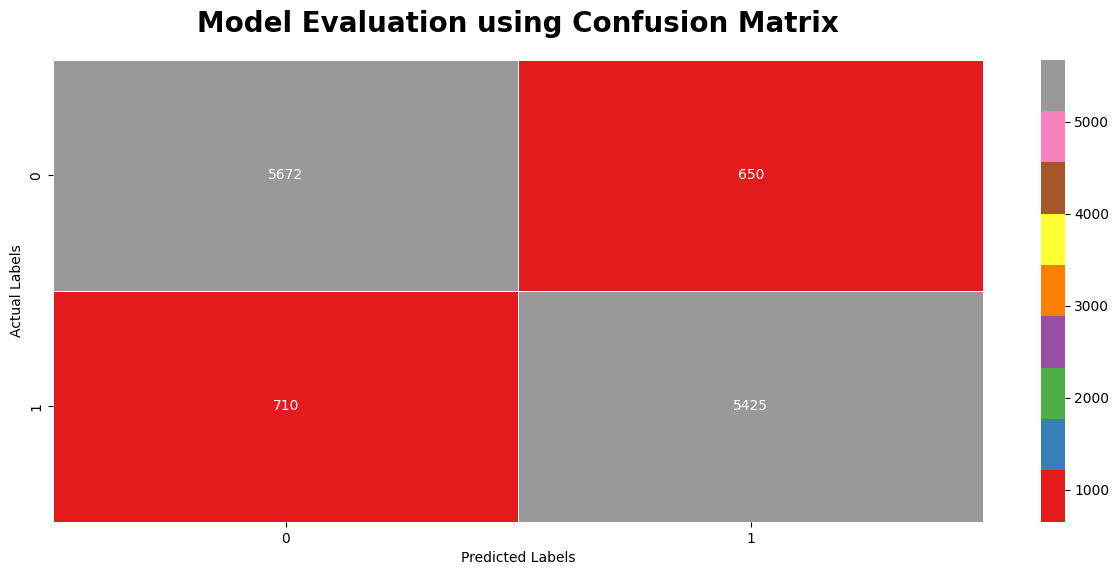

In [136]:
y_test_pred = bayes.predict(x_test)
cm = confusion_matrix(y_test,y_test_pred)

plt.figure(figsize=(15,6))
sns.heatmap(data=cm, linewidth=.5, annot=True, fmt="g", cmap="Set1")
plt.title("Model Evaluation using Confusion Matrix",fontsize=20,pad=20,fontweight="black")
plt.ylabel("Actual Labels")
plt.xlabel("Predicted Labels")
plt.show()

# GridSearchCV For Naive Bayes


In [137]:
from sklearn.naive_bayes import BernoulliNB  # Import BernoulliNB class
from sklearn.model_selection import GridSearchCV
n_classes = len(np.unique(y_train))

params = {'alpha': [0.01, 0.1, 0.5, 1.0, 10.0],
          'fit_prior': [True, False],
          'class_prior': [None, [0.1,]* (n_classes), ],
          'binarize': [None, 0.0, 8.5, 10.0]
         }

bernoulli_nb_grid = GridSearchCV(BernoulliNB(), param_grid=params, n_jobs=-1, cv=5, verbose=5)
bernoulli_nb_grid.fit(x_train,y_train)

print('Best Parameters : {}'.format(bernoulli_nb_grid.best_params_))
print('Best Accuracy Through Grid Search : {:.3f}\n'.format(bernoulli_nb_grid.best_score_))

Fitting 5 folds for each of 80 candidates, totalling 400 fits
Best Parameters : {'alpha': 0.01, 'binarize': None, 'class_prior': None, 'fit_prior': False}
Best Accuracy Through Grid Search : 0.813



In [138]:
grid_predictionss = bernoulli_nb_grid.predict(x_test) 

# print classification report 
print(classification_report(y_test, grid_predictionss)) 

              precision    recall  f1-score   support

         0.0       0.82      0.84      0.83      6322
         1.0       0.83      0.81      0.82      6135

    accuracy                           0.82     12457
   macro avg       0.82      0.82      0.82     12457
weighted avg       0.82      0.82      0.82     12457



# 4) K-Nearest Neighbour

In [139]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)

In [140]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [141]:
knn.score(x_test,y_test)

0.9009392309544835

In [142]:
y_pred_knn= knn.predict(x_test)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("Accuracy (Naive Bayes):", accuracy_knn)
print("Classification Report (Naive Bayes):")
print(classification_report(y_test, y_pred))

Accuracy (Naive Bayes): 0.9009392309544835
Classification Report (Naive Bayes):
              precision    recall  f1-score   support

         0.0       0.90      0.91      0.90      6322
         1.0       0.90      0.90      0.90      6135

    accuracy                           0.90     12457
   macro avg       0.90      0.90      0.90     12457
weighted avg       0.90      0.90      0.90     12457



In [143]:
m5 = 'K-NeighborsClassifier'
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train, y_train)
knn_predicted = knn.predict(x_test)
knn_conf_matrix = confusion_matrix(y_test, knn_predicted)
knn_acc_score = accuracy_score(y_test, knn_predicted)
print("confussion matrix")
print(knn_conf_matrix)
print("\n")
print("Accuracy of K-NeighborsClassifier:",knn_acc_score*100,'\n')
print(classification_report(y_test,knn_predicted))

confussion matrix
[[5886  436]
 [ 798 5337]]


Accuracy of K-NeighborsClassifier: 90.09392309544835 

              precision    recall  f1-score   support

         0.0       0.88      0.93      0.91      6322
         1.0       0.92      0.87      0.90      6135

    accuracy                           0.90     12457
   macro avg       0.90      0.90      0.90     12457
weighted avg       0.90      0.90      0.90     12457



# AUC- ROC Curve and AUC- ROC Score

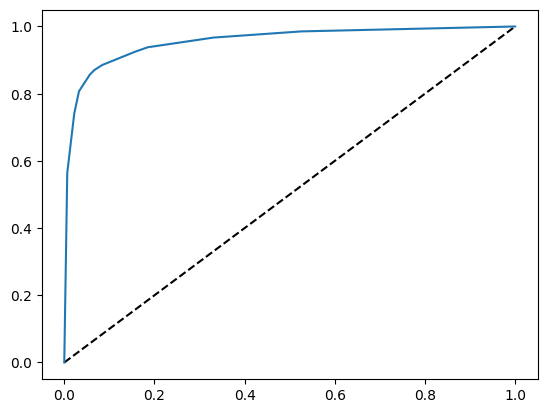

In [144]:
roc_c = knn.predict_proba(x_train)[:,1]

fpr,tpr,threshold = metrics.roc_curve(y_train,roc_c)
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label= "K- NN")
plt.show()

In [145]:
metrics.roc_auc_score(y_train,roc_c)

0.9560619051648754

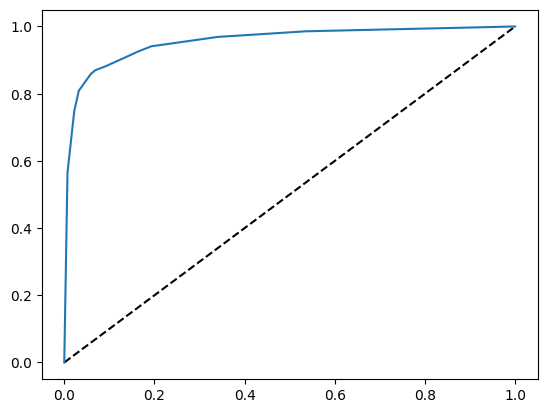

In [146]:
rocc_c = knn.predict_proba(x_test)[:,1]

fpr,tpr,threshold = metrics.roc_curve(y_test,rocc_c)
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label= "K-NN")
plt.show()

In [147]:
metrics.roc_auc_score(y_test,rocc_c)

0.9555544254072466

# Confusion Matrix

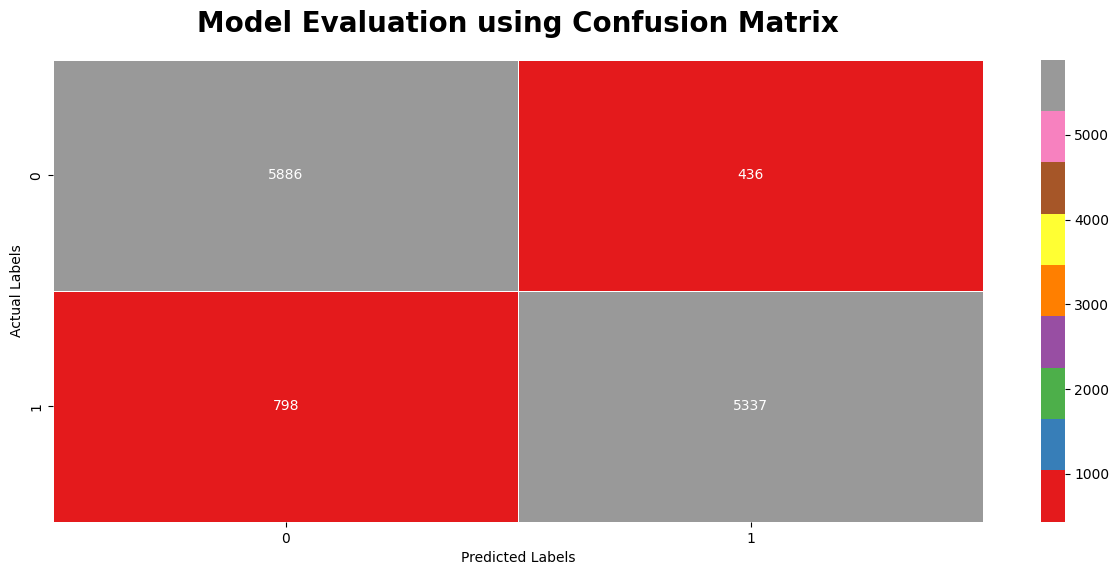

In [148]:
cm = confusion_matrix(y_test,y_pred_knn)

plt.figure(figsize=(15,6))
sns.heatmap(data=cm, linewidth=.5, annot=True, fmt="g", cmap="Set1")
plt.title("Model Evaluation using Confusion Matrix",fontsize=20,pad=20,fontweight="black")
plt.ylabel("Actual Labels")
plt.xlabel("Predicted Labels")
plt.show()

# GridSearchCV

In [149]:
# Define the hyperparameters to search through
param_grid = {
    'n_neighbors': np.arange(1, 21),  # Number of neighbors to consider
    'weights': ['uniform', 'distance'],  # Weighting type
    'p': [1, 2]  # Distance metric (1 for Manhattan, 2 for Euclidean)
}
# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)

# Perform the grid search
grid_search.fit(x, y)

# Print the best hyperparameters and corresponding accuracy
print("Best Parameters: ", grid_search.best_params_)
print("Best Accuracy: ", grid_search.best_score_)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
Best Parameters:  {'n_neighbors': 19, 'p': 1, 'weights': 'uniform'}
Best Accuracy:  0.8815262718265927
